In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

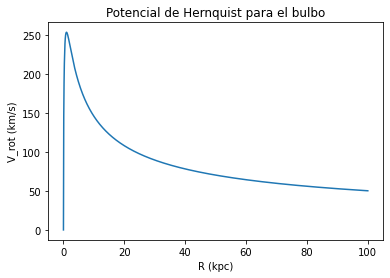

<Figure size 720x576 with 0 Axes>

In [12]:
#declarando constantes
G = 6.67e-11 #m^3 s^-2 kg^-1
M_sol = 1.98e30 #kg
kpc = 3.08e19 #m

#para cambiar G a mi sistema de unidades
G1 = G*M_sol/kpc**3 #kpc^3/s^2 M_sol

#definiendo la velocidad de rotación
    #V_c^2=R|dphi/dR|
    
    #potencial de Hernquist: phi_H(r)=-GM_H/(r+r0) donde r0 es un radio característico
    
def hernquist(M,r,r0):

    v = np.sqrt((G1*r*M)/(r+r0)**2) #kpc/s
    v1 = v*3.08e16 #km/s
    return v1

#Masa del bulbo aproximada que mejor se ajusta al modelo
#1 kpc = radio del bulbo
M = 6e10 #masas solares
r0 = 1 #kpc

#generar radios para graficar
radios=np.linspace(0,100,1000)

#calcular velocidades de rotación
v_rot_h = hernquist(M,radios,r0)

#graficar
plt.plot(radios,v_rot_h, label="Potencial Hernquist")
plt.xlabel("R (kpc)")
plt.ylabel("V_rot (km/s)")
plt.title("Potencial de Hernquist para el bulbo")
plt.figure(figsize=(10, 8))
#plt.savefig('Potencial Hernquist para el bulbo.png')
plt.show()

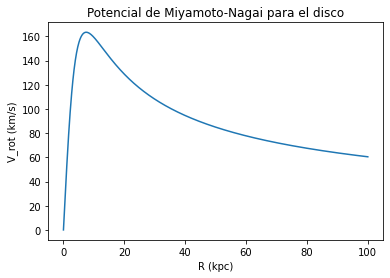

In [14]:
#Definiendo parámetros que mejor se ajustan al modelo
a= 5.10
b= 0.19
M_mn= 8.56e10 #Masas solares
#Masa obtenida del paper An improved model of the galactic mass distribution for orbit computations

#Potencial Miyamoto-Nagai:
    #phi_MN(r,z)=-GM_MN/(r^2+(a+(z^2+b^2)^0.5)^2)^0.5

#Definiendo la velocidad de rotación para este potencial
#Se calculará la velocidad de rotación en z=0
def miyamotonagai(M_mn,r,a,b):

    v=r*np.sqrt(G1*M_mn/(r**2+(a+b)**2)**1.5) #kpc/s
    v1=v*3.08e16 #km/s
    return v1

#Calculando las velocidades de rotación
v_rot_mn = miyamotonagai(M_mn,radios,a,b)

#graficar
plt.plot(radios,v_rot_mn, label="Potencial MN")
plt.xlabel("R (kpc)")
plt.ylabel("V_rot (km/s)")
plt.title("Potencial de Miyamoto-Nagai para el disco")
plt.show()

/var/folders/xy/h39hc5k93gsf7qcm_6602k100000gn/T/ipykernel_15168/1071796139.py:11: RuntimeWarning: invalid value encountered in true_divide
  v=np.sqrt((G1*M_nfw*(((r+a)*np.log(1+r/a))-r)/(r*(r+a)))) #kpc/s


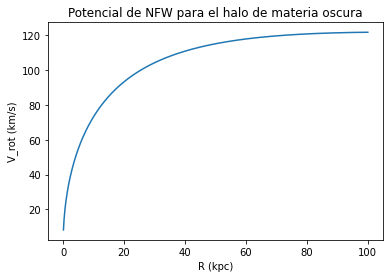

In [67]:
#Definiendo parámetros que mejor se ajustan al modelo
a1=50
M_nfw=8.002e11 #Masas solares

#Potencial NFW
    #phi_NFW(r)=-GM_NFW(ln(1+r/a1))/r

#Definiendo la velocidad de rotación
def nfw(M_nfw,a,r):
    
    v=np.sqrt((G1*M_nfw*(((r+a)*np.log(1+r/a))-r)/(r*(r+a)))) #kpc/s
    v1=v*3.08e16 #km/s
    return v1

#Calculando las velocidades de rotación
v_rot_nfw = nfw(M_nfw,a1,radios)

#graficar
plt.plot(radios,v_rot_nfw, label="Potencial NFW")
plt.xlabel("R (kpc)")
plt.ylabel("V_rot (km/s)")
plt.title("Potencial de NFW para el halo de materia oscura")
plt.show()

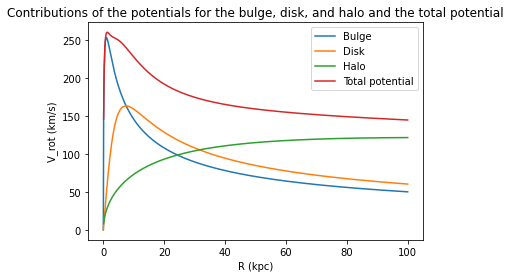

In [68]:
#graficando las contribuciones de los potenciales para cada parte de la galaxia: bulbo, disco y DM halo
#y el potencial total
plt.plot(radios,v_rot_h, label="Bulge")
plt.plot(radios,v_rot_mn, label="Disk")
plt.plot(radios,v_rot_nfw, label="Halo")
plt.plot(radios,np.sqrt(v_rot_h**2+v_rot_mn**2+v_rot_nfw**2), label="Total potential")
plt.xlabel("R (kpc)")
plt.ylabel("V_rot (km/s)")
plt.title("Contributions of the potentials for the bulge, disk, and halo and the total potential")
plt.savefig("Contributions of the potentials for the bulge, disk, and halo and the total potential")
plt.legend()
plt.show()

In [17]:
# Abre el archivo original para leer y un nuevo archivo para escribir
with open('/Users/karytzamontiel/Documents/Maestria UNAM/Dinamica y estructura galaxias/proyecto/rotation_curve.txt', 'r') as archivo_original, open("r_curve#", 'w') as archivo_sin_comentarios:
    # Lee cada línea del archivo original
    for linea in archivo_original:
        # Verifica si la línea comienza con el carácter de comentario (por ejemplo, '#')
        if not linea.startswith('#'):
            # Escribe las líneas que no son comentarios en el archivo sin comentarios
            archivo_sin_comentarios.write(linea)

In [32]:
# Abre el archivo sin comentarios para leer
with open("r_curve#", 'r') as archivo_sin_comentarios:
    # Lee cada línea del archivo y la imprime en la consola
    for linea in archivo_sin_comentarios:
#        print(linea.strip())  # strip() elimina los caracteres de nueva línea al final de cada línea

IndentationError: expected an indented block (1462601818.py, line 5)

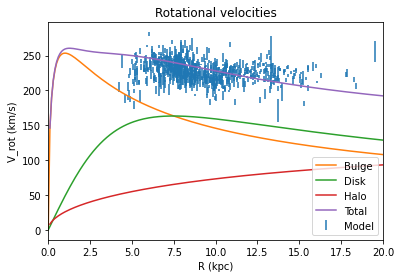

In [197]:
# Listas para almacenar los datos de las columnas
x = []
y = []
x_e = []
y_e = []

# Abre el archivo de texto y lee los datos de las columnas
with open("r_curve#", 'r') as archivo:
    for linea in archivo:
        # Divide la línea en dos partes (valores de x e y separados por espacio)
        valores = linea.split()
        # Convierte los valores de cadena a números flotantes y los agrega a las listas x e y
        x.append(float(valores[1]))
        x_e.append(float(valores[2]))
        y.append(float(valores[3]))
        y_e.append(float(valores[4]))

# Grafica los datos, potenciales individuales y potencial total
plt.errorbar(x, y, y_e,linestyle="",label="Model")
plt.plot(radios,v_rot_h, label="Bulge")
plt.plot(radios,v_rot_mn, label="Disk")
plt.plot(radios,v_rot_nfw, label="Halo")
plt.plot(radios,np.sqrt(v_rot_h**2+v_rot_mn**2+v_rot_nfw**2), label="Total")
plt.xlabel("R (kpc)")
plt.ylabel("V_rot (km/s)")
plt.xlim(0,20) #los datos llegan hasta 20
plt.title("Rotational velocities")
plt.legend()
plt.legend(loc='lower right')
plt.savefig("Rotational velocities")
plt.show()

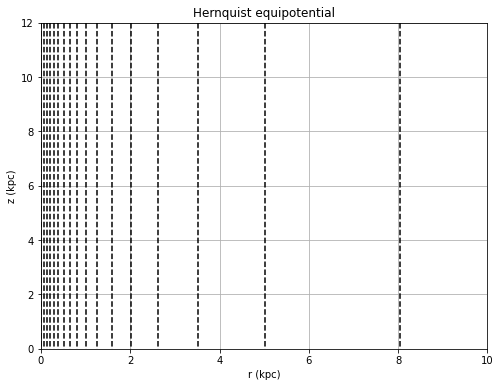

In [222]:
#Definiendo los potenciales

def hernquistpotential(G1,M,r,r0):  
    hpot=(-G1*M)/(r+r0)
    return hpot

def miyamotonagaipotential(G1,M_mn,a,b,z,r):
    mnpot=(-G1*M_mn)/(np.sqrt(r**2+(a+np.sqrt(z**2+b**2))**2))
    return mnpot

def nfwpotential(G1,M_nfw,r,a1):
    nfwpot=((-G1*M_nfw)/r)*(1+r/a1)
    return nfwpot

def totalpotential(r,z):
    totpot=hernquistpotential(G1,M,r,r0)+miyamotonagaipotential(G1,M_mn,a,b,z,r)+nfwpotential(G1,M_nfw,r,a1) #kpc^2/s^2
    #totpot1=totpot*(3.086e16)**2#km^2/s^2
    totpot2=np.abs(totpot)
    totpot3=np.log(totpot2)
    return totpot3
   
#Rango de valores para r y z
r_values = np.linspace(0, 10, 100)
z_values = np.linspace(-0, 12, 100)

# Calcula el potencial total en cada punto del espacio para el potencial de hernquist
potential_values = np.zeros((len(r_values), len(z_values)))
for i, r in enumerate(r_values):
    for j, z in enumerate(z_values):
        potential_values[i, j] = hernquistpotential(G1,M,r,r0)
        
# Grafica las equipotenciales
plt.figure(figsize=(8, 6))
plt.contour(r_values, z_values, potential_values.T, 20, colors='black')
plt.xlabel('r (kpc)')
plt.ylabel('z (kpc)')
plt.title('Hernquist equipotential')
plt.grid(True)
plt.savefig('Hernquist equipotential')
plt.show()

In [216]:
potential_values.T

array([[-2.71200275e-28, -2.46319516e-28, -2.25620397e-28, ...,
        -2.51158346e-29, -2.48830651e-29, -2.46545704e-29],
       [-2.71200275e-28, -2.46319516e-28, -2.25620397e-28, ...,
        -2.51158346e-29, -2.48830651e-29, -2.46545704e-29],
       [-2.71200275e-28, -2.46319516e-28, -2.25620397e-28, ...,
        -2.51158346e-29, -2.48830651e-29, -2.46545704e-29],
       ...,
       [-2.71200275e-28, -2.46319516e-28, -2.25620397e-28, ...,
        -2.51158346e-29, -2.48830651e-29, -2.46545704e-29],
       [-2.71200275e-28, -2.46319516e-28, -2.25620397e-28, ...,
        -2.51158346e-29, -2.48830651e-29, -2.46545704e-29],
       [-2.71200275e-28, -2.46319516e-28, -2.25620397e-28, ...,
        -2.51158346e-29, -2.48830651e-29, -2.46545704e-29]])

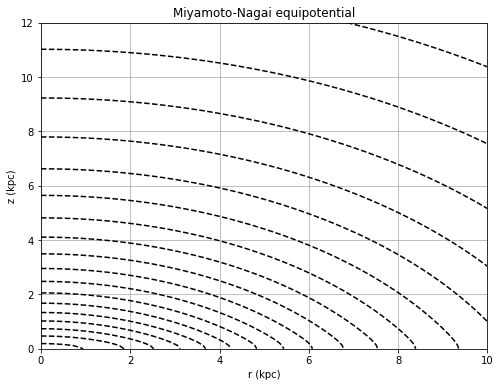

In [223]:
# Calcula el potencial total en cada punto del espacio para el potencial de miyamoto-nagai
potential_values = np.zeros((len(r_values), len(z_values)))
for i, r in enumerate(r_values):
    for j, z in enumerate(z_values):
        potential_values[i, j] = miyamotonagaipotential(G1,M_mn,a,b,z,r)
        
# Grafica las equipotenciales
plt.figure(figsize=(8, 6))
plt.contour(r_values, z_values, potential_values.T, 20, colors='black')
plt.xlabel('r (kpc)')
plt.ylabel('z (kpc)')
plt.title('Miyamoto-Nagai equipotential')
plt.grid(True)
plt.savefig('Miyamoto-Nagai equipotential')
plt.show()

In [207]:
potential_values.T

array([[-2.56202749e-29, -2.56194497e-29, -2.56169745e-29, ...,
        -2.02158105e-29, -2.01372134e-29, -2.00587339e-29],
       [-2.59675851e-29, -2.59667259e-29, -2.59641487e-29, ...,
        -2.03851302e-29, -2.03045496e-29, -2.02241051e-29],
       [-2.63244382e-29, -2.63235431e-29, -2.63208582e-29, ...,
        -2.05564080e-29, -2.04737873e-29, -2.03913227e-29],
       ...,
       [-2.63244382e-29, -2.63235431e-29, -2.63208582e-29, ...,
        -2.05564080e-29, -2.04737873e-29, -2.03913227e-29],
       [-2.59675851e-29, -2.59667259e-29, -2.59641487e-29, ...,
        -2.03851302e-29, -2.03045496e-29, -2.02241051e-29],
       [-2.56202749e-29, -2.56194497e-29, -2.56169745e-29, ...,
        -2.02158105e-29, -2.01372134e-29, -2.00587339e-29]])

/var/folders/xy/h39hc5k93gsf7qcm_6602k100000gn/T/ipykernel_15168/2814144609.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  nfwpot=((-G1*M_nfw)/r)*(1+r/a1)


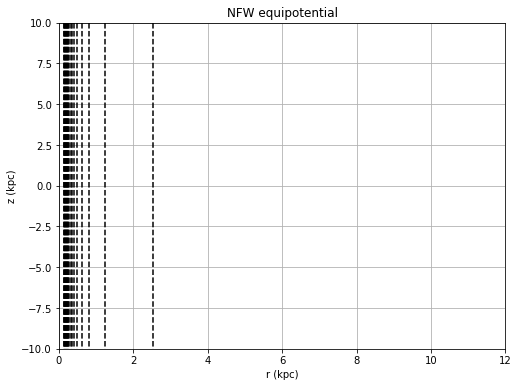

In [208]:
# Calcula el potencial total en cada punto del espacio para el potencial de nfw
potential_values = np.zeros((len(r_values), len(z_values)))
for i, r in enumerate(r_values):
    for j, z in enumerate(z_values):
        potential_values[i, j] = nfwpotential(G1,M_nfw,r,a1)
        
# Grafica las equipotenciales
plt.figure(figsize=(8, 6))
plt.contour(r_values, z_values, potential_values.T, 20, colors='black')
plt.xlabel('r (kpc)')
plt.ylabel('z (kpc)')
plt.title('NFW equipotential')
plt.grid(True)
plt.savefig('NFW equipotential')
plt.show()

In [209]:
potential_values.T

array([[           -inf, -2.99118264e-26, -1.49920823e-26, ...,
        -3.79961743e-28, -3.76822727e-28, -3.73747125e-28],
       [           -inf, -2.99118264e-26, -1.49920823e-26, ...,
        -3.79961743e-28, -3.76822727e-28, -3.73747125e-28],
       [           -inf, -2.99118264e-26, -1.49920823e-26, ...,
        -3.79961743e-28, -3.76822727e-28, -3.73747125e-28],
       ...,
       [           -inf, -2.99118264e-26, -1.49920823e-26, ...,
        -3.79961743e-28, -3.76822727e-28, -3.73747125e-28],
       [           -inf, -2.99118264e-26, -1.49920823e-26, ...,
        -3.79961743e-28, -3.76822727e-28, -3.73747125e-28],
       [           -inf, -2.99118264e-26, -1.49920823e-26, ...,
        -3.79961743e-28, -3.76822727e-28, -3.73747125e-28]])

/var/folders/xy/h39hc5k93gsf7qcm_6602k100000gn/T/ipykernel_15168/2756471787.py:12: RuntimeWarning: divide by zero encountered in double_scalars
  nfwpot=((-G1*M_nfw)/r)*(1+r/a1)


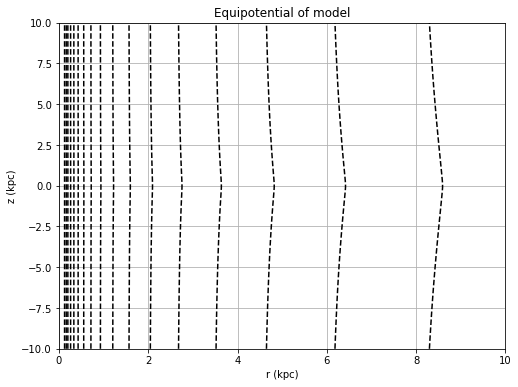

In [220]:
# Calcula el potencial total en cada punto del espacio para el potencial total
potential_values = np.zeros((len(r_values), len(z_values)))
for i, r in enumerate(r_values):
    for j, z in enumerate(z_values):
        potential_values[i, j] = totalpotential(r,z)
        
# Grafica las equipotenciales
plt.figure(figsize=(8, 6))
plt.contour(r_values, z_values, potential_values.T, 20, colors='black')
plt.xlabel('r (kpc)')
plt.ylabel('z (kpc)')
plt.title('Equipotential of model')
plt.grid(True)
plt.savefig('Equipotential of model')
plt.show()

In [183]:
potential_values.T

array([[         inf, -58.76106761, -59.44302834, ..., -63.01091202,
        -63.01928223, -63.02755559],
       [         inf, -58.76107906, -59.44305094, ..., -63.01096786,
        -63.01933711, -63.02760954],
       [         inf, -58.76110688, -59.44310582, ..., -63.01110623,
        -63.01947313, -63.02774325],
       ...,
       [         inf, -58.76262885, -59.44611483, ..., -63.03348428,
        -63.04162844, -63.04967727],
       [         inf, -58.76263464, -59.4461263 , ..., -63.03368569,
        -63.0418291 , -63.04987717],
       [         inf, -58.76264035, -59.44613762, ..., -63.03388597,
        -63.04202867, -63.05007599]])

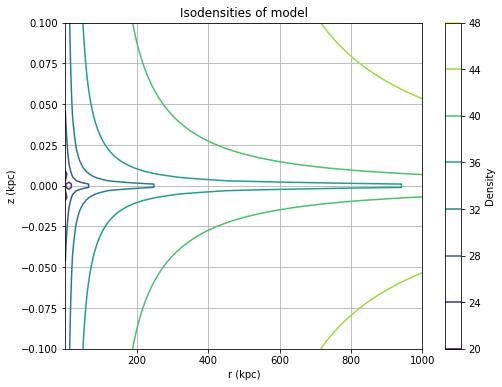

In [185]:
#Definir la densidad usando la ecuación de Poisson en coordenadas cilíndricas
def density(M,r,r0,M_mn,a,b,z,M_nfw,a1):
    mn1=r**2+(a+np.sqrt(z**2+b**2))**2
    mn2=np.sqrt(z**2+b**2)
    mn3=a+np.sqrt(z**2+b**2)
    rho=(0.25/np.pi)*(((-M*(r-r0))/(r*(r+r0)**3))+((M_mn)*((2/(mn1)**1.5)-(3*r**2)/(mn1)**2.5))+(M_nfw)*(((1/((r*a1**2)*((r/a1)+1)**2)))-((np.log(r/a1+1)-r/(a1*(r/a1+1))))/r**3)+M_mn*(((mn3/(mn2*mn1**1.5))-(((z**2)*mn3)/((z**2+b**2)**1.5)*(mn1)**1.5)+(z**2/((z**2+b**2))*(mn1**1.5))-((3*z**2*mn2**2)/((z**2+b**2)*(mn1)**2.5)))))
    #rho_p=((0.25*1/np.pi)*(((-M*(r-r0))/(r*(r+r0)**3))+((M_mn)*((2/(mn1)**1.5)-(3*r**2)/(mn1)**2.5))+(M_nfw)*(((1/((r*a1**2)*((r/a1)+1)**2)))-((np.log(r/a1+1)-r/(a1*(r/a1+1))))/r**3)))
    rho1=np.abs(rho)
    rho2=np.log(rho1)
    return rho2 #Regresa el logaritmo del valor absoluto de la densidad

#Rango de valores para R y z
r_values = np.linspace(0.1,1000, 100)
z_values = np.linspace(-0.1, 0.1, 100)

# Calcula la densidad total en cada punto del espacio
density_values = np.zeros((len(r_values), len(z_values)))
for i, r in enumerate(r_values):
    for j, z in enumerate(z_values):
        density_values[i, j] = density(M,r,r0,M_mn,a,b,z,M_nfw,a1)

# Grafica las isodensidades
plt.figure(figsize=(8, 6))
plt.contour(r_values, z_values, density_values.T, 5, cmap='viridis')
plt.xlabel('r (kpc)')
plt.ylabel('z (kpc)')
plt.title('Isodensities of model')
plt.grid(True)
plt.colorbar(label='Density')
plt.savefig('Isodensities of model')
plt.show()

In [169]:
density_values.T

array([[29.28697765, 31.60885959, 33.41271823, ..., 44.94350026,
        44.97426574, 45.00471893],
       [29.25851864, 31.58099993, 33.38493732, ..., 44.91575314,
        44.94651862, 44.97697181],
       [29.2290501 , 31.55213629, 33.35615118, ..., 44.88700023,
        44.91776571, 44.9482189 ],
       ...,
       [29.2290501 , 31.55213629, 33.35615118, ..., 44.88700023,
        44.91776571, 44.9482189 ],
       [29.25851864, 31.58099993, 33.38493732, ..., 44.91575314,
        44.94651862, 44.97697181],
       [29.28697765, 31.60885959, 33.41271823, ..., 44.94350026,
        44.97426574, 45.00471893]])

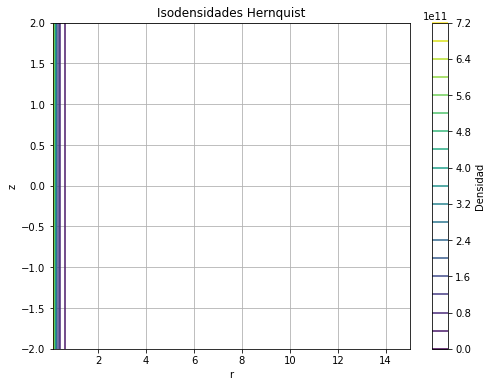

In [170]:
def denhernquist(M,r0,r):
    rho_H=(M/2*np.pi)*(r0/(r*(r+r0)**3))
    return rho_H

#Rango de valores para R y z
r_values = np.linspace(0.1, 15, 100)
z_values = np.linspace(-2, 2, 100)

# Calcula la densidad total en cada punto del espacio
density_values = np.zeros((len(r_values), len(z_values)))
for i, r in enumerate(r_values):
    for j, z in enumerate(z_values):
        density_values[i, j] = denhernquist(M,r0,r)

# Grafica las isodensidades
plt.figure(figsize=(8, 6))
plt.contour(r_values, z_values, density_values.T, 20, cmap='viridis')
plt.xlabel('r')
plt.ylabel('z')
plt.title('Isodensidades Hernquist')
plt.grid(True)
plt.colorbar(label='Densidad')
plt.show()

In [171]:
density_values.T

array([[7.08097518e+11, 1.92396998e+11, 8.54657318e+10, ...,
        1.65717551e+06, 1.59409119e+06, 1.53398079e+06],
       [7.08097518e+11, 1.92396998e+11, 8.54657318e+10, ...,
        1.65717551e+06, 1.59409119e+06, 1.53398079e+06],
       [7.08097518e+11, 1.92396998e+11, 8.54657318e+10, ...,
        1.65717551e+06, 1.59409119e+06, 1.53398079e+06],
       ...,
       [7.08097518e+11, 1.92396998e+11, 8.54657318e+10, ...,
        1.65717551e+06, 1.59409119e+06, 1.53398079e+06],
       [7.08097518e+11, 1.92396998e+11, 8.54657318e+10, ...,
        1.65717551e+06, 1.59409119e+06, 1.53398079e+06],
       [7.08097518e+11, 1.92396998e+11, 8.54657318e+10, ...,
        1.65717551e+06, 1.59409119e+06, 1.53398079e+06]])

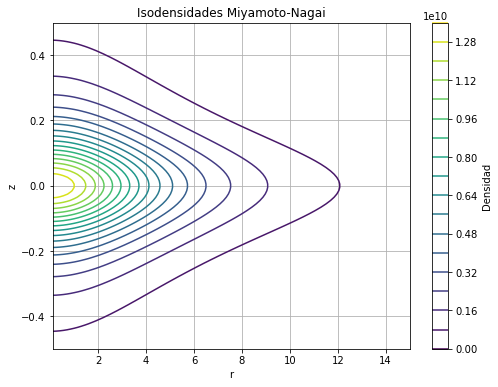

In [172]:
def denMN(M_mn,r,z,a,b):
    mn1=a+np.sqrt(z**2+b**2)
    mn2=z**2+b**2
    mn3=a+3*np.sqrt(z**2+b**2)
    mn4=r**2+(a+np.sqrt(z**2+b**2))**2
    rho_MN=((b**2)*M_mn/4*np.pi)*((a*r**2+mn3*mn1**2)/(mn4**2.5*mn2**1.5))
    return rho_MN

#Rango de valores para R y z
r_values = np.linspace(0.1, 15, 100)
z_values = np.linspace(-0.5, 0.5, 100)

# Calcula la densidad total en cada punto del espacio
density_values = np.zeros((len(r_values), len(z_values)))
for i, r in enumerate(r_values):
    for j, z in enumerate(z_values):
        density_values[i, j] = denMN(M_mn,r,z,a,b)

# Grafica las isodensidades
plt.figure(figsize=(8, 6))
plt.contour(r_values, z_values, density_values.T, 20, cmap='viridis')
plt.xlabel('r')
plt.ylabel('z')
plt.title('Isodensidades Miyamoto-Nagai')
plt.grid(True)
plt.colorbar(label='Densidad')
plt.show()

In [130]:
density_values.T

array([[inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       ...,
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf],
       [inf, inf, inf, ..., inf, inf, inf]])